In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the datasets
train_data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test_data = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

# Fill missing values
fill_mode = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']
for col in fill_mode:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(), inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean(), inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_columns:
    train_data[col] = label_encoder.fit_transform(train_data[col])
    test_data[col] = label_encoder.transform(test_data[col])

train_data['Dependents'] = train_data['Dependents'].replace('3+', 3).astype(int)
test_data['Dependents'] = test_data['Dependents'].replace('3+', 3).astype(int)

# Encode target variable
train_data['Loan_Status'] = train_data['Loan_Status'].map({'Y': 1, 'N': 0})

# Split the data into features and target
X = train_data.drop(columns=['Loan_ID', 'Loan_Status'])
y = train_data['Loan_Status']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on validation set
y_pred_log_reg = log_reg.predict(X_val)

# Evaluate the model
log_reg_accuracy = accuracy_score(y_val, y_pred_log_reg)
log_reg_report = classification_report(y_val, y_pred_log_reg)

log_reg_accuracy, log_reg_report


(0.7886178861788617,
 '              precision    recall  f1-score   support\n\n           0       0.95      0.42      0.58        43\n           1       0.76      0.99      0.86        80\n\n    accuracy                           0.79       123\n   macro avg       0.85      0.70      0.72       123\nweighted avg       0.83      0.79      0.76       123\n')

In [3]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on validation set
y_pred_tree = decision_tree.predict(X_val)

# Evaluate the model
tree_accuracy = accuracy_score(y_val, y_pred_tree)
tree_report = classification_report(y_val, y_pred_tree)

tree_accuracy, tree_report

(0.6991869918699187,
 '              precision    recall  f1-score   support\n\n           0       0.57      0.56      0.56        43\n           1       0.77      0.78      0.77        80\n\n    accuracy                           0.70       123\n   macro avg       0.67      0.67      0.67       123\nweighted avg       0.70      0.70      0.70       123\n')

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Predict on validation set
y_pred_forest = random_forest.predict(X_val)

# Evaluate the model
forest_accuracy = accuracy_score(y_val, y_pred_forest)
forest_report = classification_report(y_val, y_pred_forest)

forest_accuracy, forest_report


(0.7642276422764228,
 '              precision    recall  f1-score   support\n\n           0       0.82      0.42      0.55        43\n           1       0.75      0.95      0.84        80\n\n    accuracy                           0.76       123\n   macro avg       0.79      0.68      0.70       123\nweighted avg       0.78      0.76      0.74       123\n')

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)

# Predict on validation set
y_pred_gb = gradient_boosting.predict(X_val)

# Evaluate the model
gb_accuracy = accuracy_score(y_val, y_pred_gb)
gb_report = classification_report(y_val, y_pred_gb)

gb_accuracy, gb_report


(0.7642276422764228,
 '              precision    recall  f1-score   support\n\n           0       0.79      0.44      0.57        43\n           1       0.76      0.94      0.84        80\n\n    accuracy                           0.76       123\n   macro avg       0.77      0.69      0.70       123\nweighted avg       0.77      0.76      0.74       123\n')

In [6]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
param_grid_forest = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search_forest = GridSearchCV(estimator=random_forest, param_grid=param_grid_forest, cv=5, n_jobs=-1, verbose=2)
grid_search_forest.fit(X_train, y_train)

# Best parameters and model
best_params_forest = grid_search_forest.best_params_
best_forest = grid_search_forest.best_estimator_

# Predict on validation set
y_pred_best_forest = best_forest.predict(X_val)

# Evaluate the best model
best_forest_accuracy = accuracy_score(y_val, y_pred_best_forest)
best_forest_report = classification_report(y_val, y_pred_best_forest)

best_params_forest, best_forest_accuracy, best_forest_report


Fitting 5 folds for each of 81 candidates, totalling 405 fits


({'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 10,
  'n_estimators': 100},
 0.7804878048780488,
 '              precision    recall  f1-score   support\n\n           0       0.90      0.42      0.57        43\n           1       0.76      0.97      0.85        80\n\n    accuracy                           0.78       123\n   macro avg       0.83      0.70      0.71       123\nweighted avg       0.81      0.78      0.75       123\n')

In [7]:
# Hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# Grid Search
grid_search_gb = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train)

# Best parameters and model
best_params_gb = grid_search_gb.best_params_
best_gb = grid_search_gb.best_estimator_

# Predict on validation set
y_pred_best_gb = best_gb.predict(X_val)

# Evaluate the best model
best_gb_accuracy = accuracy_score(y_val, y_pred_best_gb)
best_gb_report = classification_report(y_val, y_pred_best_gb)

best_params_gb, best_gb_accuracy, best_gb_report


Fitting 5 folds for each of 54 candidates, totalling 270 fits


({'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 100,
  'subsample': 0.8},
 0.7886178861788617,
 '              precision    recall  f1-score   support\n\n           0       0.95      0.42      0.58        43\n           1       0.76      0.99      0.86        80\n\n    accuracy                           0.79       123\n   macro avg       0.85      0.70      0.72       123\nweighted avg       0.83      0.79      0.76       123\n')

In [8]:
# Feature Engineering
X_train['Total_Income'] = X_train['ApplicantIncome'] + X_train['CoapplicantIncome']
X_train['EMI'] = X_train['LoanAmount'] / X_train['Loan_Amount_Term']
X_train['Balance_Income'] = X_train['Total_Income'] - (X_train['EMI'] * 1000)

X_val['Total_Income'] = X_val['ApplicantIncome'] + X_val['CoapplicantIncome']
X_val['EMI'] = X_val['LoanAmount'] / X_val['Loan_Amount_Term']
X_val['Balance_Income'] = X_val['Total_Income'] - (X_val['EMI'] * 1000)

# Adding these features to the test data as well
test_data['Total_Income'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']
test_data['EMI'] = test_data['LoanAmount'] / test_data['Loan_Amount_Term']
test_data['Balance_Income'] = test_data['Total_Income'] - (test_data['EMI'] * 1000)

# Drop the original columns
X_train.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], inplace=True)
X_val.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], inplace=True)
test_data.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], inplace=True)


In [9]:
# Train final model with advanced features and best hyperparameters (Random Forest example)
final_model = RandomForestClassifier(
    n_estimators=best_params_forest['n_estimators'],
    max_depth=best_params_forest['max_depth'],
    min_samples_split=best_params_forest['min_samples_split'],
    min_samples_leaf=best_params_forest['min_samples_leaf'],
    random_state=42
)
final_model.fit(X_train, y_train)

# Predict on validation set
y_pred_final = final_model.predict(X_val)

# Evaluate the final model
final_accuracy = accuracy_score(y_val, y_pred_final)
final_report = classification_report(y_val, y_pred_final)

final_accuracy, final_report


(0.7560975609756098,
 '              precision    recall  f1-score   support\n\n           0       0.76      0.44      0.56        43\n           1       0.76      0.93      0.83        80\n\n    accuracy                           0.76       123\n   macro avg       0.76      0.68      0.70       123\nweighted avg       0.76      0.76      0.74       123\n')

In [10]:
# Predict on the test dataset
test_preds = final_model.predict(test_data.drop(columns=['Loan_ID']))

# Create a submission DataFrame
submission = pd.DataFrame({
    'Loan_ID': test_data['Loan_ID'],
    'Loan_Status': test_preds
})

# Convert predictions back to 'Y' and 'N'
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})

# Save the submission to a CSV file
submission.to_csv('Loan_Predictions_Submission.csv', index=False)

# Display the first few rows of the submission
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


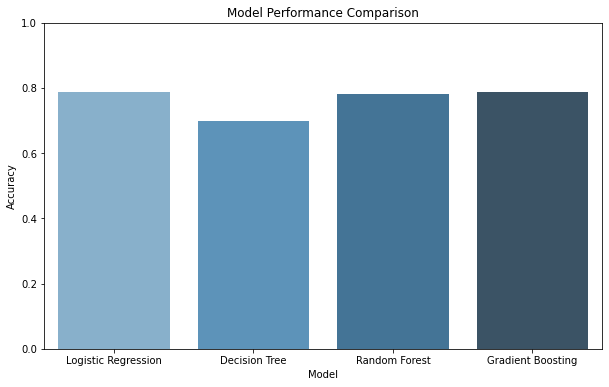

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Collect model performance data
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
model_accuracies = [log_reg_accuracy, tree_accuracy, best_forest_accuracy, best_gb_accuracy]

# Plot model performance
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=model_accuracies, palette="Blues_d")
plt.ylim(0, 1)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


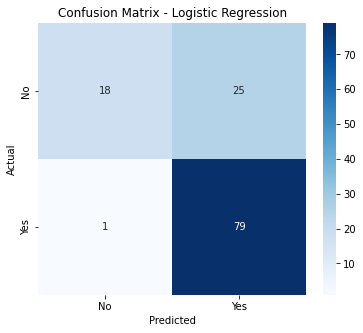

In [13]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Compute confusion matrix
conf_matrix_log_reg = confusion_matrix(y_val, y_pred_log_reg)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


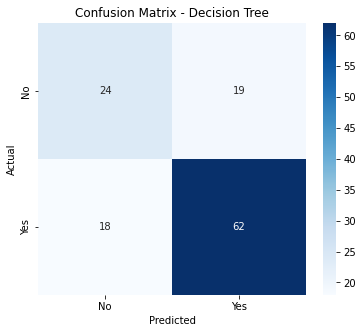

In [14]:
# Compute confusion matrix
conf_matrix_tree = confusion_matrix(y_val, y_pred_tree)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


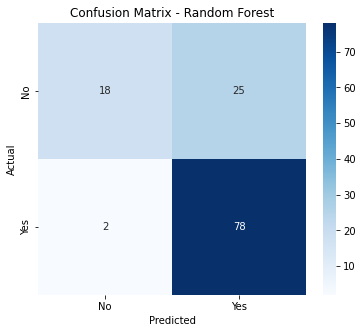

In [15]:
# Compute confusion matrix
conf_matrix_forest = confusion_matrix(y_val, y_pred_best_forest)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_forest, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


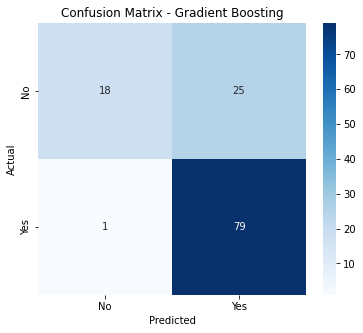

In [16]:
# Compute confusion matrix
conf_matrix_gb = confusion_matrix(y_val, y_pred_best_gb)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [18]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_log_reg = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
cv_tree = cross_val_score(decision_tree, X, y, cv=5, scoring='accuracy')
cv_forest = cross_val_score(best_forest, X, y, cv=5, scoring='accuracy')
cv_gb = cross_val_score(best_gb, X, y, cv=5, scoring='accuracy')

# Print cross-validation results
print("Logistic Regression CV Accuracy:", cv_log_reg.mean())
print("Decision Tree CV Accuracy:", cv_tree.mean())
print("Random Forest CV Accuracy:", cv_forest.mean())
print("Gradient Boosting CV Accuracy:", cv_gb.mean())


Logistic Regression CV Accuracy: 0.8061975209916034
Decision Tree CV Accuracy: 0.6987471677995469
Random Forest CV Accuracy: 0.8062241769958683
Gradient Boosting CV Accuracy: 0.8029588164734107


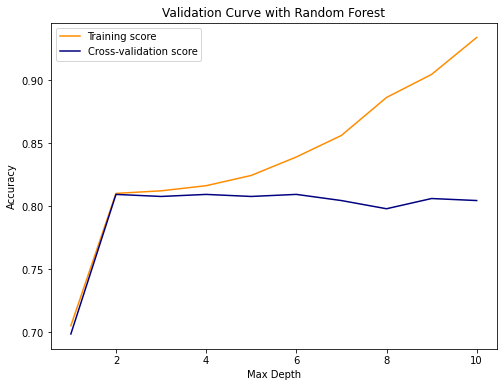

In [22]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 11)
train_scores, test_scores = validation_curve(
    RandomForestClassifier(), X, y, param_name="max_depth", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange")
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy")
plt.title("Validation Curve with Random Forest")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()


In [23]:
from sklearn.ensemble import VotingClassifier

# Define a voting classifier with Logistic Regression, Random Forest, and Gradient Boosting
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('forest', best_forest),
        ('gb', best_gb)
    ], voting='soft')

# Train voting classifier
voting_clf.fit(X_train, y_train)

# Predict and evaluate voting classifier
y_pred_voting = voting_clf.predict(X_val)
voting_accuracy = accuracy_score(y_val, y_pred_voting)
voting_report = classification_report(y_val, y_pred_voting)

print("Voting Classifier Accuracy:", voting_accuracy)
print(voting_report)


Voting Classifier Accuracy: 0.7804878048780488
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



KeyError: 'Total_Income'

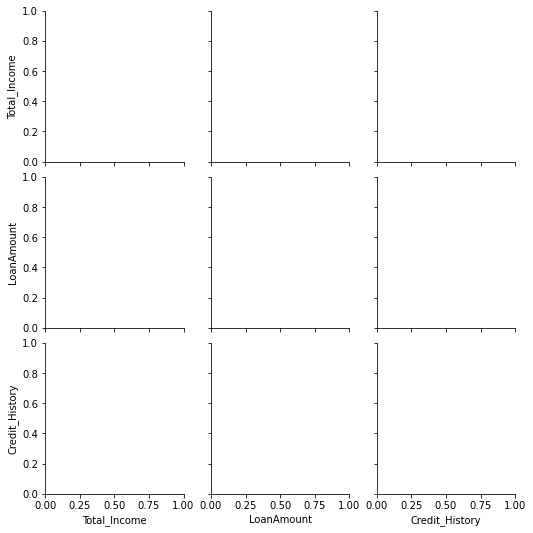

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships between features
sns.pairplot(train_data, hue='Loan_Status', vars=['Total_Income', 'LoanAmount', 'Credit_History'])
plt.title('Pairplot of Features')
plt.show()


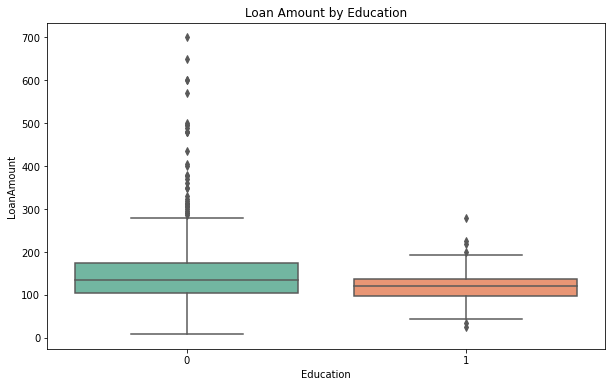

ValueError: Could not interpret input 'Total_Income'

<Figure size 720x432 with 0 Axes>

In [30]:
# Boxplot of Loan Amount by Education
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='LoanAmount', data=train_data, palette="Set2")
plt.title('Loan Amount by Education')
plt.show()

# Boxplot of Total Income by Property Area
plt.figure(figsize=(10, 6))
sns.boxplot(x='Property_Area', y='Total_Income', data=train_data, palette="Set3")
plt.title('Total Income by Property Area')
plt.show()
